# Attention !!! 
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.

# Sampling

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, expon


def sample_normal(sample_size=10, mu=0, std=1):
  # TODO#1.1: #
  distribution = norm(loc=mu, scale=std)
  return distribution.rvs(sample_size)
  ###

def sample_bernoulli(sample_size=10, p=0.5):
  # TODO#1.2:
  distribution = bernoulli(p=p)
  return distribution.rvs(sample_size)
  ###

def sample_binomial(sample_size=10, n=10, p=0.5):
  # TODO#1.3:
  distribution = binom(n=n, p=p)
  return distribution.rvs(sample_size)
  ###

def sample_multinomial(sample_size=10, n=100, p=[0.3, 0.2, 0.5]):
  # TODO#1.4:
  distribution = multinomial(n, p=p)
  return distribution.rvs(sample_size)
  ###

def sample_uniform(sample_size=10, from_x=0, to_x=1):
  # TODO#1.5:
  distribution = uniform(loc=from_x, scale=to_x-from_x)
  return distribution.rvs(sample_size)
  ###


# TODO#1.6:
def sample_triangle(sample_size=10, a=0, b=1):
  cdf = uniform.rvs(size=sample_size)
  x = triangle_inv_cdf(cdf, a, b)
  return x
###


def triangle_pdf(x, a=0, b=1):
  # y = 2/((b-a)**2) * x
  y = 4/((b-a)**2) * x
  y[len(x)//2+1:] = -4/((a-b)**2) * (x[len(x)//2+1:]-b)
  y[(x < a) | (x > b)] = 0
  return y


def triangle_cdf(x, a=0, b=1):
  y = np.copy(x)
  # y = 0.5 * 4/((b-a)**2) * (x[sel_left]**2)
  sel_left = x <= (a+b)/2
  y[sel_left] = 0.5 * 4/((b-a)**2) * (x[sel_left]**2)
  y[~sel_left] = 1 - 0.5 * (b-x[~sel_left]) * (-4/((a-b)**2) * (x[~sel_left]-b))
  y[x < a] = 0
  y[x > b] = 0
  return y


def triangle_inv_cdf(p, a=0, b=1):
  x = np.copy(p)
  sel_left = (p <= 0.5)
  x[sel_left] = a + np.sqrt(2*p[sel_left]) * abs((b-a)/2)
  x[~sel_left] = b - np.sqrt(2*(1-p[~sel_left])) * abs((a-b)/2)
  return x

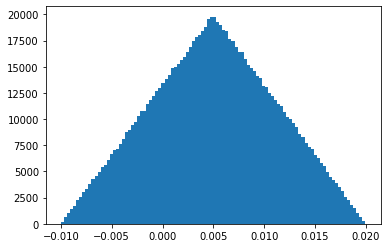

In [ ]:
# Use this code block to show your sampling result.
sample_size = 1000000
s = sample_triangle(sample_size, -0.01, 0.02)
count, bins, ignored = plt.hist(s, 100, density=False)
plt.show()

In [ ]:
s = sample_triangle(sample_size=10000, a=-0.01, b=0.02)
s.var(), s.mean()

(3.831360586406313e-05, 0.004970758338372641)

In [ ]:
s = sample_uniform(sample_size=10000, from_x=-0.01, to_x=0.02)
s.var(), s.mean()

(7.584795481823349e-05, 0.005135973567548148)

In [ ]:
criterion = 1e-3
sample_size = int(1e7)
assert sample_normal(sample_size, mu=0, std=1).mean() < criterion
assert sample_bernoulli(sample_size, p=0.5).sum()/sample_size - 0.5 < criterion
assert sample_binomial(sample_size, n=1, p=0.5).sum() / sample_size - 0.5 < criterion
assert sample_multinomial(sample_size, n=1, p=[0.5, 0.5])[:,0].sum()/sample_size - 0.5 < criterion
assert sample_uniform(sample_size, from_x=0, to_x=1).mean() - 0.5 < criterion
assert sample_triangle(sample_size, a=0, b=1).mean() - 0.5 < criterion

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000. 
What does the graph imply about the difference between the empirical mean and the theoritical mean?

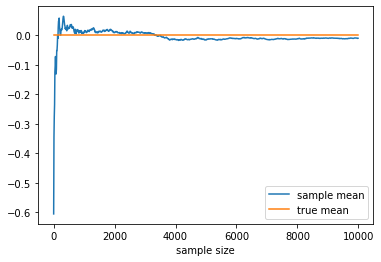

In [ ]:
target_sample_size=10000
step_sample_size = 10
sample_means = []
samples = []
mu, sigma = 0, 1 # mean and standard deviation

for i in range(0, target_sample_size, step_sample_size):
  s = sample_normal(step_sample_size, mu, sigma)
  samples.extend(s.tolist())
  sample_means.append(np.mean(samples))

plt.plot(np.arange(0, target_sample_size, step_sample_size), sample_means, label='sample mean')
plt.plot(np.arange(0, target_sample_size, step_sample_size), np.zeros(len(sample_means)), label='true mean')
plt.xlabel("sample size")
plt.legend()
plt.show()

**ANS TODO#2:** The sample mean is closer and closer to the true mean as the sample size grows.

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range. 

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k. 
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

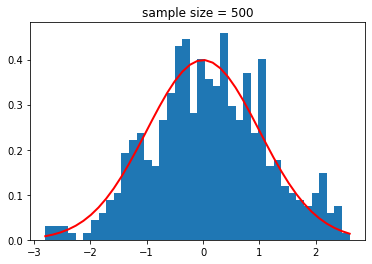

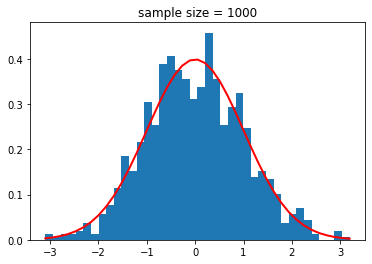

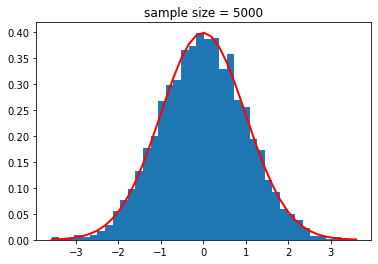

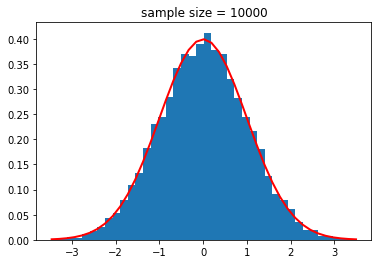

The more sample size the closer of the histogram to the true distribution.


In [ ]:
# ANS TODO#3

mu, sigma = 0, 1 # mean and standard deviation
bin_size = 40

for sample_size in [500, 1000, 5000, 10000]:
  s = sample_normal(sample_size, mu, sigma)
  count, bins, ignored = plt.hist(s, bin_size, density=True)
  plt.plot(bins, norm.pdf(bins, mu, sigma), linewidth=2, color='r')
  plt.title(f"sample size = {sample_size}")
  plt.show()

print("The more sample size the closer of the histogram to the true distribution.")

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

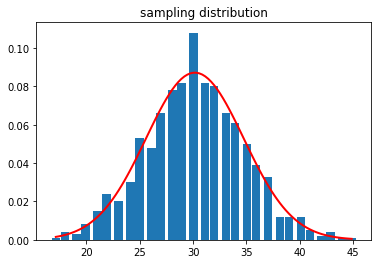

In [ ]:
#ANS TODO#4
sample_size=100
sample_step=1000

sample_data = []

for i in range(sample_step):
  s = sample_binomial(1, n=sample_size, p=0.3)
  sample_data.append(s[0])

sample_std = np.std(sample_data)
sample_var = np.var(sample_data)
sample_mean = np.mean(sample_data)

hist, bins = np.histogram(sample_data, bins=100, range=None, normed=None, weights=None, density=True)
x_center = (bins[1:] + bins[:-1])/2
plt.bar(x_center, hist / hist.sum())
plt.plot(x_center, norm.pdf(x_center, sample_mean, sample_std), linewidth=2, color='r')


plt.title('sampling distribution')
plt.show()

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [ ]:
# ANS TODO#5
clt = 1-norm.cdf(40, loc=sample_mean, scale=sample_std)
print (f"CLT prob of getting more than 40 heads \t\t: {clt}.")

# ANS TODO#6
from scipy.stats import binom, norm
theory = 1-binom.cdf(40, 100, 0.3, loc=0)
print (f"Theoritical prob of getting more than 40 heads \t: {theory}.")

print(f"The difference is \t\t\t\t: {np.abs(theory-clt)}.")

CLT prob of getting more than 40 heads 		: 0.01585117081371512.
Theoritical prob of getting more than 40 heads 	: 0.012498407166438241.
The difference is 				: 0.0033527636472768796.


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) = 
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

Sum of uniform pmf: 1.0000000000000007
Sum of normal pmf: 1.0000000000000007
Sum of convoluted pmf: 1.0000000000000002
Integration of convoluted pdf: 0.9999999999999789


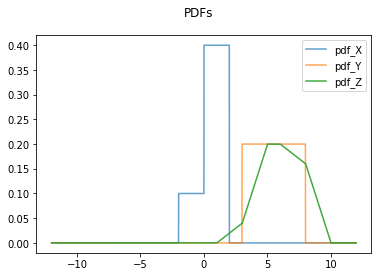

In [ ]:
# ANS TODO#7
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal


def dist1_pdf(X):
  result = np.zeros(shape=X.shape)
  result[(-2 <= X) & (X <= 0)] = 0.1
  result[(0 < X) & (X <= 2)] = 0.4
  return result


dist1 = stats.uniform(loc=-2, scale=4)
dist2 = stats.uniform(loc=3, scale=5)

delta = 0.01
big_grid = np.arange(-12,12, delta)

pmf1 = dist1_pdf(big_grid)*delta
print("Sum of uniform pmf: "+str(sum(pmf1)))

pmf2 = dist2.pdf(big_grid)*delta
print("Sum of normal pmf: "+str(sum(pmf2)))


# conv_pmf = signal.fftconvolve(pmf1, pmf2,'same')
conv_pmf = np.convolve(pmf1, pmf2,'same')
print("Sum of convoluted pmf: "+str(sum(conv_pmf)))

pdf1 = pmf1/delta
pdf2 = pmf2/delta
conv_pdf = conv_pmf/delta
print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, big_grid)))


plt.plot(big_grid, pdf1, alpha=0.7, label='pdf_X')
plt.plot(big_grid, pdf2, alpha=0.7, label='pdf_Y')
plt.plot(big_grid, conv_pdf, alpha=0.9, label='pdf_Z')

plt.legend(loc='best'), plt.suptitle('PDFs')
plt.show()

In [ ]:
conv_pmf[(3<=big_grid) & (big_grid<=5)].sum()

0.23760600000000004

# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and 
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9090,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

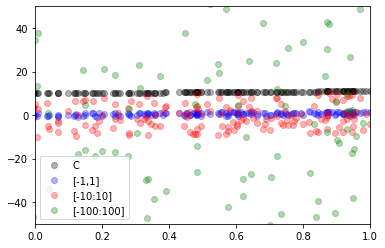

Correlation:
C	[-1,1]	[-10:10]	[-100:100]
1.000	0.712	0.042		0.056


In [ ]:
# ANS TODO#8
sample_data = 300
X = sample_uniform(sample_data, from_x=-1, to_x=1)
A = sample_uniform(sample_data, from_x=-1, to_x=1)
B = sample_uniform(sample_data, from_x=-10, to_x=10)
C = sample_uniform(sample_data, from_x=-100, to_x=100)

Y = X+10
cor1 = np.corrcoef(X,Y)[0,1]
P1 = plt.scatter(X, Y, color='black', alpha=0.3)

Y = X+A
cor2 = np.corrcoef(X,Y)[0,1]
P2 = plt.scatter(X, Y, color='blue', alpha=0.3)

Y = X+B
cor3 = np.corrcoef(X,Y)[0,1]
P3 = plt.scatter(X, Y, color='red', alpha=0.3)

Y = X+C
cor4 = np.corrcoef(X,Y)[0,1]
P4 = plt.scatter(X, Y, color='green', alpha=0.3)


plt.ylim(-50, 50)
plt.xlim(0, 1)
plt.legend((P1, P2, P3, P4),
           ('C', '[-1,1]', '[-10:10]', '[-100:100]'),
           scatterpoints=1,
           loc='lower left',
           )

plt.show()
print("Correlation:")
print("C\t[-1,1]\t[-10:10]\t[-100:100]")
print("{:.3f}\t{:.3f}\t{:.3f}\t\t{:.3f}".format(abs(cor1), abs(cor2), abs(cor3), abs(cor4)))

In [ ]:
# ANS TODO#9.1
# Yes. For a constant relation (8.1), it is a deterministic change between X and Y, and the correlation between twos is the highest.
# As we introduces randomness into the relation, Y can not be derived deterministically from X.
# This makes the correlation between X,Y decreases.
# If we further add the randomness the correlation is further go downs. At some point, we will not entirely sure if there any relation between two random variables.
# Conventionally, we will say that X correlates to Y if their correlation is higher than 0.5.

# ANS TODO#9.2
D = sample_uniform(sample_data, from_x=10000-10, to_x=10000+10)
Y = X+D
cor5 = np.corrcoef(X,Y)[0,1]
Y = X+B+10000
cor6 = np.corrcoef(X,Y)[0,1]

print("U[10k-10,10k+10]\t10k+U[-10,10]\tU[-10:10]")
print("{:.3f}\t\t\t{:.3f}\t\t{:.3f}".format(abs(cor5), abs(cor6), abs(cor3)))

# Correlations between twos are in the same scales since the their randomness are the same.
# The variance of data of two distributions, U[10k-10,10k+10]	and U[-10,10], are equal.
# The difference is the scale of their values.

U[10k-10,10k+10]	10k+U[-10,10]	U[-10:10]
0.160			0.042		0.042


# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

In [ ]:
# 1. The probability of failure is a parabola with the vertex at 15. This makes any temp. that differs from 15 increases the probability of disk to fail.

In [1]:
# 2.
from scipy.stats import binom
from scipy.integrate import quad

def pdf(t):
  # integrate over the parabola of failure * U(mu-1, mu+1)
  return ( 0.97/2250*(t-15)**2 + 0.001 ) * 1/2

# The probailibty of one disk to fail if the temperature is set to 15.
# which equals to the probailibty of one disk to fail if the room temperature is uniformly distribution between [15-1, 15+1].
# which equal to = sum_{t} P(fail|t)P(t) for t in [14,16].
p_fail, error = quad(pdf, 14, 16) # set mu  as 15

# The probability of the system failure equals to the probability all disks fail simulteneously.
p_alldisk_fail = p_fail
print('n disks =', 1)
print('Failure probability per request =', p_alldisk_fail)

n disks = 1
Failure probability per request = 0.0011437037037037036


In [ ]:
# 3.
from scipy.stats import binom
from scipy.integrate import quad

def pdf(t):
  # integrate over the parabola of failure * U(mu-1, mu+1)
  return ( 0.97/2250*(t-15)**2 + 0.001 ) * 1/2

# The probailibty of one disk to fail if the temperature is set to 15.
# which equals to the probailibty of one disk to fail if the room temperature is uniformly distribution between [15-1, 15+1].
# which equal to = sum_{t} P(fail|t)P(t) for t in [14,16].
p_fail, error = quad(pdf, 14, 16) # set mu  as 15
for i in range(1, 10):
  # The probability of the system failure equals to the probability all disks fail simulteneously.
  p_alldisk_fail = p_fail ** i
  # We would like to find n_disk such that P(#fail >= 2 | #req = 10k ) <= 0.01%.
  # We've got confidence = 1 - P(#fail <= 1) = P(#fail >= 2)
  confidence = 1 - binom.cdf(1, 10000, p_alldisk_fail) #; use cdf(0, 10k) for `at least` 1 fail/10k.
  print('n disks =', i)
  print('Failure probability per request =', p_alldisk_fail)
  print('Probability of having more than 1 fail per 10k request =', confidence)
  if (confidence <= 0.0001):
    break

n disks = 1
Failure probability per request = 0.0011437037037037036
Probability of having more than 1 fail per 10k request = 0.9999892819606864
n disks = 2
Failure probability per request = 1.3080581618655692e-06
Probability of having more than 1 fail per 10k request = 0.012995411056608508
n disks = 3
Failure probability per request = 1.49603096438551e-09
Probability of having more than 1 fail per 10k request = 1.4960197764035676e-05


In [ ]:
from scipy.stats import binom
from scipy.integrate import quad
import numpy as np

# Another perspective
for n in range(1, 5):
    pdf = lambda t : ( 0.97/2250*(t-15)**2 + 0.001 ) * 0.5
    p_fail,err = quad(pdf,14,16)
    p_success = 1 - p_fail ** n
    # P(#fail >= 2) = P(#success <= 9998 | #req = 10k) #; use P(#success <= 9999 | #nreq = 10k) for `at least` 1 fail/10k.
    success_confidence = binom.cdf(9998, 10000, p_success) #allow to fail 2, 1, 0 times
    print('n disks =', n)
    print('bernoulli success_p =', p_success)
    print('prob at success<=9998/10000 =', success_confidence)
    if (success_confidence <= 0.0001):
        break

assert success_confidence - confidence < 1e-7

n disks = 1
bernoulli success_p = 0.9988562962962962
prob at success<=9998/10000 = 0.9998665589893753
n disks = 2
bernoulli success_p = 0.9999986919418381
prob at success<=9998/10000 = 8.480008480262605e-05


In [ ]:
# 4.1 15
# 4.2 0.001

from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

def pdf(t):
  # integrate over parabola * N(mu, std)
  std = 3
  mu= 15
  return ( 0.97/2250*(t-15)**2 + 0.001 ) * norm.pdf(t, mu, std)

p_fail, error = quad(pdf, 0, 30)

for i in range(1, 10):
  p_alldisk_fail = p_fail**i
  # We've got confidence = 1 - P(#fail <= 1) = P(#fail >= 2)
  confidence = 1 - binom.cdf(1, 10000, p_alldisk_fail) #; use cdf(0, 10k) for `at least` 1 fail.
  print('n disks =', i)
  print('Failure probability per request =', p_alldisk_fail)
  print('Probability of having more than 1 fail per 10k request =', confidence)
  if (confidence <= 0.0001):
    break

n disks = 1
Failure probability per request = 0.004879939517563487
Probability of having more than 1 fail per 10k request = 1.0
n disks = 2
Failure probability per request = 2.3813809695077754e-05
Probability of having more than 1 fail per 10k request = 0.02422927753521875
n disks = 3
Failure probability per request = 1.1620995099474642e-07
Probability of having more than 1 fail per 10k request = 6.746473675267595e-07


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as 

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$. 

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions: 
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$. 
  hint: you should write reusable functions to make your life easier.
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  | 
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return? 
7. Which strategy is the safest one? 
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

#### Setups

In [ ]:
import numpy as np
coin_name = ['a', 'b', 'c', 'd']
init_prices = np.array([10, 10, 10, 10])

rate_mean = np.array([ 1.003, 1.002, 1.004, 1.004])
rate_cov  = np.array([
                [10, 0, 4, 5],
                [ 0, 3, 0, 0],
                [ 4, 0,12, 2],
                [ 5, 0, 2,12],
                ])/1000


In [ ]:
# P1. b is indenpedence to other coins as it has covariace 0

In [ ]:
# P2.
from tqdm import tqdm
import numpy as np

get_profit_prob = lambda coin_return : (coin_return > 0).sum()/len(coin_return)

def get_rates():
  from scipy.stats import multivariate_normal
  rates = multivariate_normal.rvs(rate_mean, rate_cov, size=1)
  return np.maximum(0, rates)

# Just a placeholder
def get_coin_price(prev_p: np.array) -> (float, float):
  rates = get_rates()
  return prev_p * rates, rates

def get_returns(n_days: int = 10, n_trials: int = 10000) -> np.array:
  N_coins = len(init_prices)
  returns = np.zeros((N_coins, n_trials))

  for nt in tqdm(range(n_trials), disable=False):
    prices = np.zeros((N_coins, n_days + 1))
    rates  = np.zeros((N_coins, n_days + 1))
    prices[:,0] = init_prices

    for t in range(1, n_days+1):
      prices[:, t], rates[:, t] = get_coin_price(prices[:, t-1])

    returns[:, nt] = prices[:, n_days] - prices[:, 0]
  return returns

#### Stats for each coin

In [ ]:
# P2.
days_choices = [30, 180]
return_of_days = dict()

for n_days in days_choices:
  return_of_days[n_days] = get_returns(n_days, n_trials=10000)
  print("\nn_days={}".format(n_days))
  print("Coin\tAvg_returns\tVariances\tProfit_probaility")
  for coin in range(len(coin_name)):
    coin_return = return_of_days[n_days][coin]
    print("{}\t{:.5e}\t{:.5e}\t{}".format(
        coin_name[coin],
        np.mean(coin_return),
        np.var(coin_return),
        get_profit_prob(coin_return)
    ))

100%|██████████| 10000/10000 [00:37<00:00, 265.95it/s]



n_days=30
Coin	Avg_returns	Variances	Profit_probaility
a	8.61625e-01	3.97016e+01	0.4582
b	6.45763e-01	1.07026e+01	0.5241
c	1.29915e+00	5.43100e+01	0.4631
d	1.30357e+00	5.72325e+01	0.4597


100%|██████████| 10000/10000 [03:41<00:00, 45.17it/s]


n_days=180
Coin	Avg_returns	Variances	Profit_probaility
a	7.18410e+00	1.43271e+03	0.3975
b	4.38381e+00	1.47064e+02	0.5519
c	1.13558e+01	4.45685e+03	0.4133
d	1.08847e+01	4.64442e+03	0.4093


In [ ]:
# P3. Coin b has the highest profit probability, and it has the smallest variance.
# P4. The expected return is positive even the profit probability is less than 0.5 because the profit margin is high.
#     The money Hamtaro get from one time winning is more than money he will lose by many losing rounds.

#### Portforlio

In [ ]:
# P5.
portforlio = np.array([
              [1.0, 0.0, 0.0, 0.0],
              [0.0, 1.0, 0.0, 0.0],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0],
              [0.5, 0.5, 0.0, 0.0],
              [0.5, 0.0, 0.5, 0.0],
              [0.5, 0.0, 0.0, 0.5],
])


for d in [30, 180]:
  return_of_coins = return_of_days[d]
  print(f"days {d}")
  print("port\t\t\texp_return\tvariance\tprofit_prob")
  for port in portforlio:
    weighted_return = np.array([port[i] * return_of_coins[i] for i in range(len(coin_name))]).sum(axis=0)

    port_return = weighted_return.mean()
    port_var = weighted_return.var()
    port_profit_prob = get_profit_prob(weighted_return)

    print("{}   \t{:e}\t{:e}\t{}".format(port, port_return, port_var, port_profit_prob))

days 30
port			exp_return	variance	profit_prob
[1. 0. 0. 0.]   	8.616253e-01	3.970157e+01	0.4582
[0. 1. 0. 0.]   	6.457630e-01	1.070255e+01	0.5241
[0. 0. 1. 0.]   	1.299147e+00	5.430997e+01	0.4631
[0. 0. 0. 1.]   	1.303567e+00	5.723249e+01	0.4597
[0.5 0.5 0.  0. ]   	7.536941e-01	1.251740e+01	0.5181
[0.5 0.  0.5 0. ]   	1.080386e+00	3.156882e+01	0.4936
[0.5 0.  0.  0.5]   	1.082596e+00	3.404469e+01	0.4863
days 180
port			exp_return	variance	profit_prob
[1. 0. 0. 0.]   	7.184097e+00	1.432714e+03	0.3975
[0. 1. 0. 0.]   	4.383805e+00	1.470641e+02	0.5519
[0. 0. 1. 0.]   	1.135578e+01	4.456845e+03	0.4133
[0. 0. 0. 1.]   	1.088473e+01	4.644424e+03	0.4093
[0.5 0.5 0.  0. ]   	5.783951e+00	3.950007e+02	0.5506
[0.5 0.  0.5 0. ]   	9.269937e+00	1.652820e+03	0.473
[0.5 0.  0.  0.5]   	9.034416e+00	1.732684e+03	0.4627


In [ ]:
# P6. Strategy 4 and 3 yield the highest return for 30 and 180 days, respectively.
# P7. Strategy 5 as it has the highest profit probability per round.
# P8. Variance of (a, c) is less than variance of (a, d). This is because cov(a, d) is larger than cov(a,c).
#     This property is stated in https://en.wikipedia.org/wiki/Variance#Basic_properties.
# P9. Follow your guts, do whatever you want.
